## Mi proyecto de Numeros de emergencia.
Dado un set de datos con localidades de AR se debe determinar el ID de referencia ingresando las coordenadas geográficas de entrada.
Ref: https://datosgobar.github.io/georef-ar-api/etl-data/


In [1]:
import pandas as pd

In [2]:
#cargar el data set desde mi pc
from google.colab import files
uploaded = files.upload()

Saving localidades_censales.csv to localidades_censales.csv


In [3]:
df = pd.read_csv('localidades_censales.csv')
df

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,funcion,id,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad simple,-27.921401,-65.837927,10007.0,Ambato,INDEC,NaN,10007010,100028.0,Los Varela,Chuchucaruana,10,Catamarca
1,Localidad simple,-28.058482,-65.813741,10007.0,Ambato,INDEC,NaN,10007020,100014.0,La Puerta,Colpes,10,Catamarca
2,Localidad simple,-27.903487,-65.879632,10007.0,Ambato,INDEC,NaN,10007030,100028.0,Los Varela,El Bolsón,10,Catamarca
3,Localidad simple,-28.214152,-65.873860,10007.0,Ambato,INDEC,NaN,10007040,100007.0,El Rodeo,El Rodeo,10,Catamarca
4,Localidad simple,-28.123397,-65.796656,10007.0,Ambato,INDEC,NaN,10007050,100014.0,La Puerta,Huaycama,10,Catamarca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,Localidad simple,-51.828509,-58.970919,94021.0,Islas del Atlántico Sur,INDEC,NaN,94021060,NaN,NaN,Pradera del Ganso (Is. Malvinas),94,"Tierra del Fuego, Antártida e Islas del Atlánt..."
4023,Localidad simple,-51.694176,-57.853518,94021.0,Islas del Atlántico Sur,INDEC,NaN,94021070,NaN,NaN,Puerto Argentino (Is. Malvinas),94,"Tierra del Fuego, Antártida e Islas del Atlánt..."
4024,Localidad simple,-51.611845,-59.521651,94021.0,Islas del Atlántico Sur,INDEC,NaN,94021080,NaN,NaN,Puerto Mitre (Is. Malvinas),94,"Tierra del Fuego, Antártida e Islas del Atlánt..."
4025,Componente de localidad compuesta,-34.429906,-59.121956,6266.0,Exaltación de la Cruz,INDEC,NaN,6266160,60266.0,Exaltación de la Cruz,Torres,6,Buenos Aires


In [4]:
df.columns

Index(['categoria', 'centroide_lat', 'centroide_lon', 'departamento_id',
       'departamento_nombre', 'fuente', 'funcion', 'id', 'municipio_id',
       'municipio_nombre', 'nombre', 'provincia_id', 'provincia_nombre'],
      dtype='object')

In [6]:
df.shape

(4027, 13)

In [8]:
df.dtypes

categoria               object
centroide_lat          float64
centroide_lon          float64
departamento_id        float64
departamento_nombre     object
fuente                  object
funcion                float64
id                       int64
municipio_id           float64
municipio_nombre        object
nombre                  object
provincia_id             int64
provincia_nombre        object
dtype: object

<Axes: >

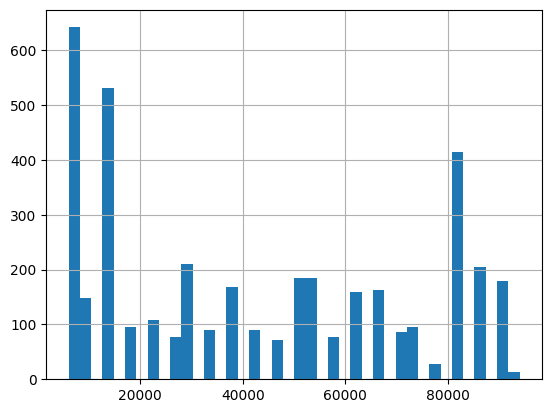

In [16]:
df.departamento_id.hist(bins=40)

In [14]:
## imputamos nulos ##
df.isnull().sum()

categoria                 0
centroide_lat             0
centroide_lon             0
departamento_id           1
departamento_nombre       1
fuente                    0
funcion                4027
id                        0
municipio_id            419
municipio_nombre        419
nombre                    0
provincia_id              0
provincia_nombre          0
dtype: int64

In [25]:
## dropeo columnas que no me interesan ##
X=df.drop(['funcion','municipio_id','municipio_nombre'], axis=1)

In [27]:
## elimino los nulos ##
X_sin_nulos = X.dropna()

In [30]:
X_sin_nulos.isnull().sum()

categoria              0
centroide_lat          0
centroide_lon          0
departamento_id        0
departamento_nombre    0
fuente                 0
id                     0
nombre                 0
provincia_id           0
provincia_nombre       0
dtype: int64

In [31]:
df_imputado=pd.DataFrame(X_sin_nulos,columns=X_sin_nulos.columns)
df_imputado

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,nombre,provincia_id,provincia_nombre
0,Localidad simple,-27.921401,-65.837927,10007.0,Ambato,INDEC,10007010,Chuchucaruana,10,Catamarca
1,Localidad simple,-28.058482,-65.813741,10007.0,Ambato,INDEC,10007020,Colpes,10,Catamarca
2,Localidad simple,-27.903487,-65.879632,10007.0,Ambato,INDEC,10007030,El Bolsón,10,Catamarca
3,Localidad simple,-28.214152,-65.873860,10007.0,Ambato,INDEC,10007040,El Rodeo,10,Catamarca
4,Localidad simple,-28.123397,-65.796656,10007.0,Ambato,INDEC,10007050,Huaycama,10,Catamarca
...,...,...,...,...,...,...,...,...,...,...
4021,Localidad simple,-51.824131,-58.461924,94021.0,Islas del Atlántico Sur,INDEC,94021050,Monte Agradable (Is. Malvinas),94,"Tierra del Fuego, Antártida e Islas del Atlánt..."
4022,Localidad simple,-51.828509,-58.970919,94021.0,Islas del Atlántico Sur,INDEC,94021060,Pradera del Ganso (Is. Malvinas),94,"Tierra del Fuego, Antártida e Islas del Atlánt..."
4023,Localidad simple,-51.694176,-57.853518,94021.0,Islas del Atlántico Sur,INDEC,94021070,Puerto Argentino (Is. Malvinas),94,"Tierra del Fuego, Antártida e Islas del Atlánt..."
4024,Localidad simple,-51.611845,-59.521651,94021.0,Islas del Atlántico Sur,INDEC,94021080,Puerto Mitre (Is. Malvinas),94,"Tierra del Fuego, Antártida e Islas del Atlánt..."


## Split train test

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split


In [33]:
# Asegúrate de separar las características (X) y la variable objetivo (y).
# Definición de variables
X = df_imputado[["centroide_lat", "centroide_lon"]]  # Características: coordenadas
y = df_imputado["departamento_id"]             # Variable objetivo:RZ

In [34]:
# Divide los datos en conjuntos de entrenamiento y prueba utilizando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y)
print (X_train, y_train)

      centroide_lat  centroide_lon
1163     -31.595801     -63.616870
3950     -27.225019     -65.357008
2666     -39.260926     -68.783378
3297     -30.143750     -61.913857
3935     -27.047562     -65.472092
...             ...            ...
1130     -32.100584     -64.469321
1294     -31.376477     -64.485411
860      -33.481363     -62.339322
3507     -29.234454     -59.581130
3174     -35.153791     -65.946171

[3220 rows x 2 columns] 1163    14119.0
3950    90091.0
2666    58035.0
3297    82091.0
3935    90028.0
         ...   
1130    14007.0
1294    14091.0
860     14063.0
3507    82049.0
3174    74042.0
Name: departamento_id, Length: 3220, dtype: float64


Explicación:

train_test_split divide los datos en un 80% para entrenamiento (X_train, y_train) y un 20% para prueba (X_test, y_test). random_state=42 asegura la reproducibilidad de la división.

##Creación del modelo KNN:
Explicación:

KNeighborsClassifier(n_neighbors=5) crea un clasificador KNN con 5 vecinos. clf.fit(X_train, y_train) entrena el modelo usando los datos de entrenamiento (X_train, y_train).

In [35]:
clf = KNN(n_neighbors=5)  # Crea el modelo con 5 vecinos
clf.fit(X_train, y_train)  # Entrena el modelo con los datos de entrenamiento

KNeighborsClassifier()

In [36]:
import warnings # para evitar warnings
warnings.filterwarnings('ignore')

In [62]:
# Predicción de una localidad
#coordenadas_nuevas = [[28.040511,-15.5730],[37.14511,-3.66460]]  # Coordenadas de entrada
coordenadas_nuevas = [[-27.1378169980594,-65.2608293281297]]
rz_predicha = clf.predict(coordenadas_nuevas)
#print (rz_predicha [0],rz_predicha [1])
print (rz_predicha [0])

90056.0


## Evaluación del modelo (opcional):
Puedes evaluar el rendimiento del modelo en el conjunto de prueba

In [42]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)  # Predice las etiquetas para el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)  # Calcula la precisión

print("Precisión del modelo:", accuracy*100)

Precisión del modelo: 74.93796526054591


## Explicación:
clf.predict(X_test) predice las etiquetas para los datos de prueba. accuracy_score calcula la precisión del modelo comparando las etiquetas predichas (y_pred) con las etiquetas reales (y_test). Puntos adicionales:

Puedes ajustar el parámetro n_neighbors para experimentar con diferentes números de vecinos. Existen otros parámetros configurables en KNeighborsClassifier como weights y metric. Explora la documentación de scikit-learn para conocer más detalles: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Probando otros modelos
## Seleccion de modelo (Feature Selection)
Knn 4 variables con foward
Knn 4 variables con backward
knn con 6 variables con foward

In [43]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [44]:
# Sequential Forward Selection(sfs)
sfs = SFS(KNN(),
          k_features=2)

In [45]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), k_features=(2, 2),
                          scoring='accuracy')

In [46]:
list(sfs.k_feature_names_)

['centroide_lat', 'centroide_lon']

In [47]:
X_train_1=X_train[list(sfs.k_feature_names_)].copy()

In [48]:
clf=KNN()

In [49]:
X_train=X_train_1

In [50]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
from sklearn.metrics import accuracy_score
X_test=X_test[list(sfs.k_feature_names_)]
y_pred_test=clf.predict(X_test)

In [ ]:
y_pred_test

In [53]:
accuracy_score(y_pred_test,y_test)

0.749379652605459